WINE CLASSIFIER


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

wine=pd.read_csv(r"X:\ML Class\w3\winequality-white.csv",sep=';')

In [2]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null value in this dataset

In [6]:
# # Step 1: Transform the "quality" column into a binary format
# wine['wine_bin'] = wine['quality'].apply(lambda x: 'high-quality' if x >= 7 else 'low-quality')

DATA VISUALISATION

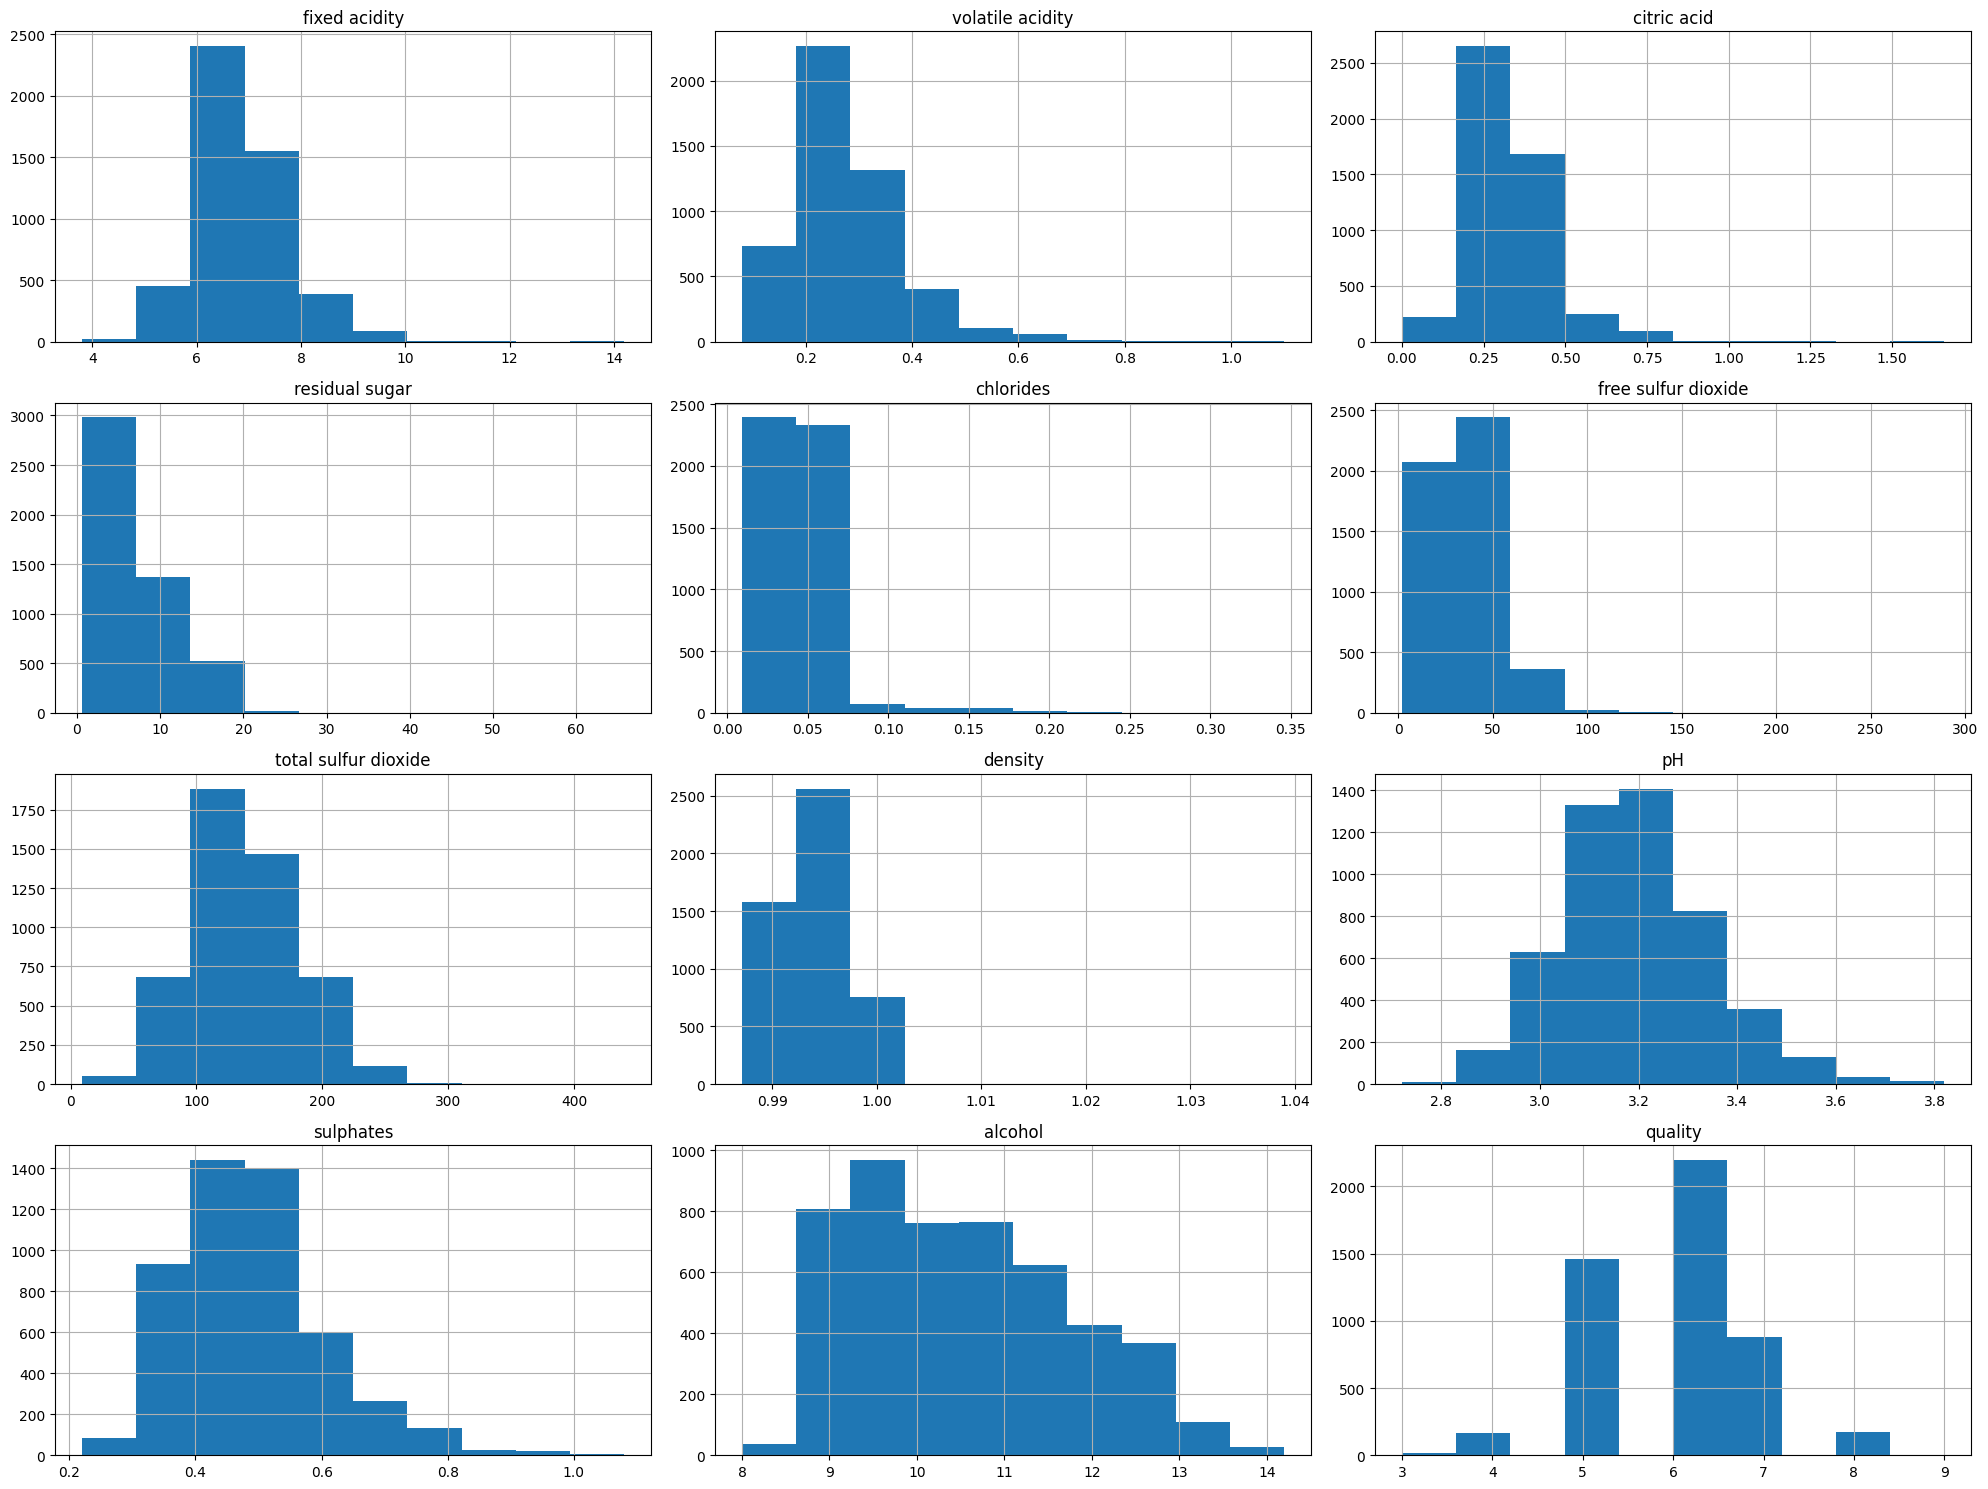

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram for all columns
wine.hist(bins=10, figsize=(20,15))
plt.tight_layout()  # This will provide better spacing between subplots
plt.show()

Note: Residual sugar, chloride, free sulfur dioxide and alcohol are skewed to the left

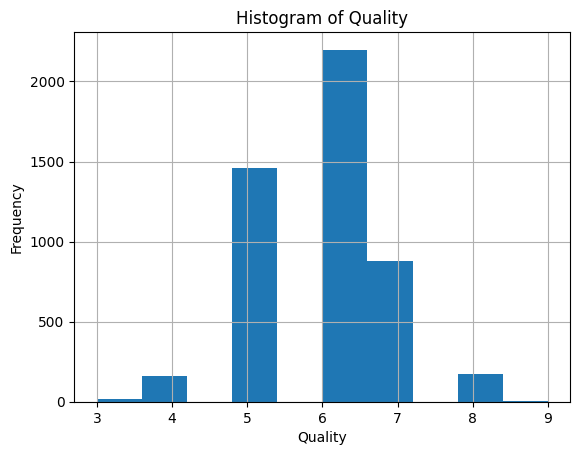

In [8]:
import matplotlib.pyplot as plt

# Plot a histogram for the "quality" column
wine['quality'].hist(bins=10)
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Note: quality at 6 has the highest count

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = wine.drop('quality', axis=1)
y = wine['quality']

# Perform a stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

FEATURE SCALING (STANDARD SCALER)

In [10]:
#Std Scaler

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)


In [11]:
y_train_high = (y_train >= 7) 
y_test_high = (y_test >= 7)

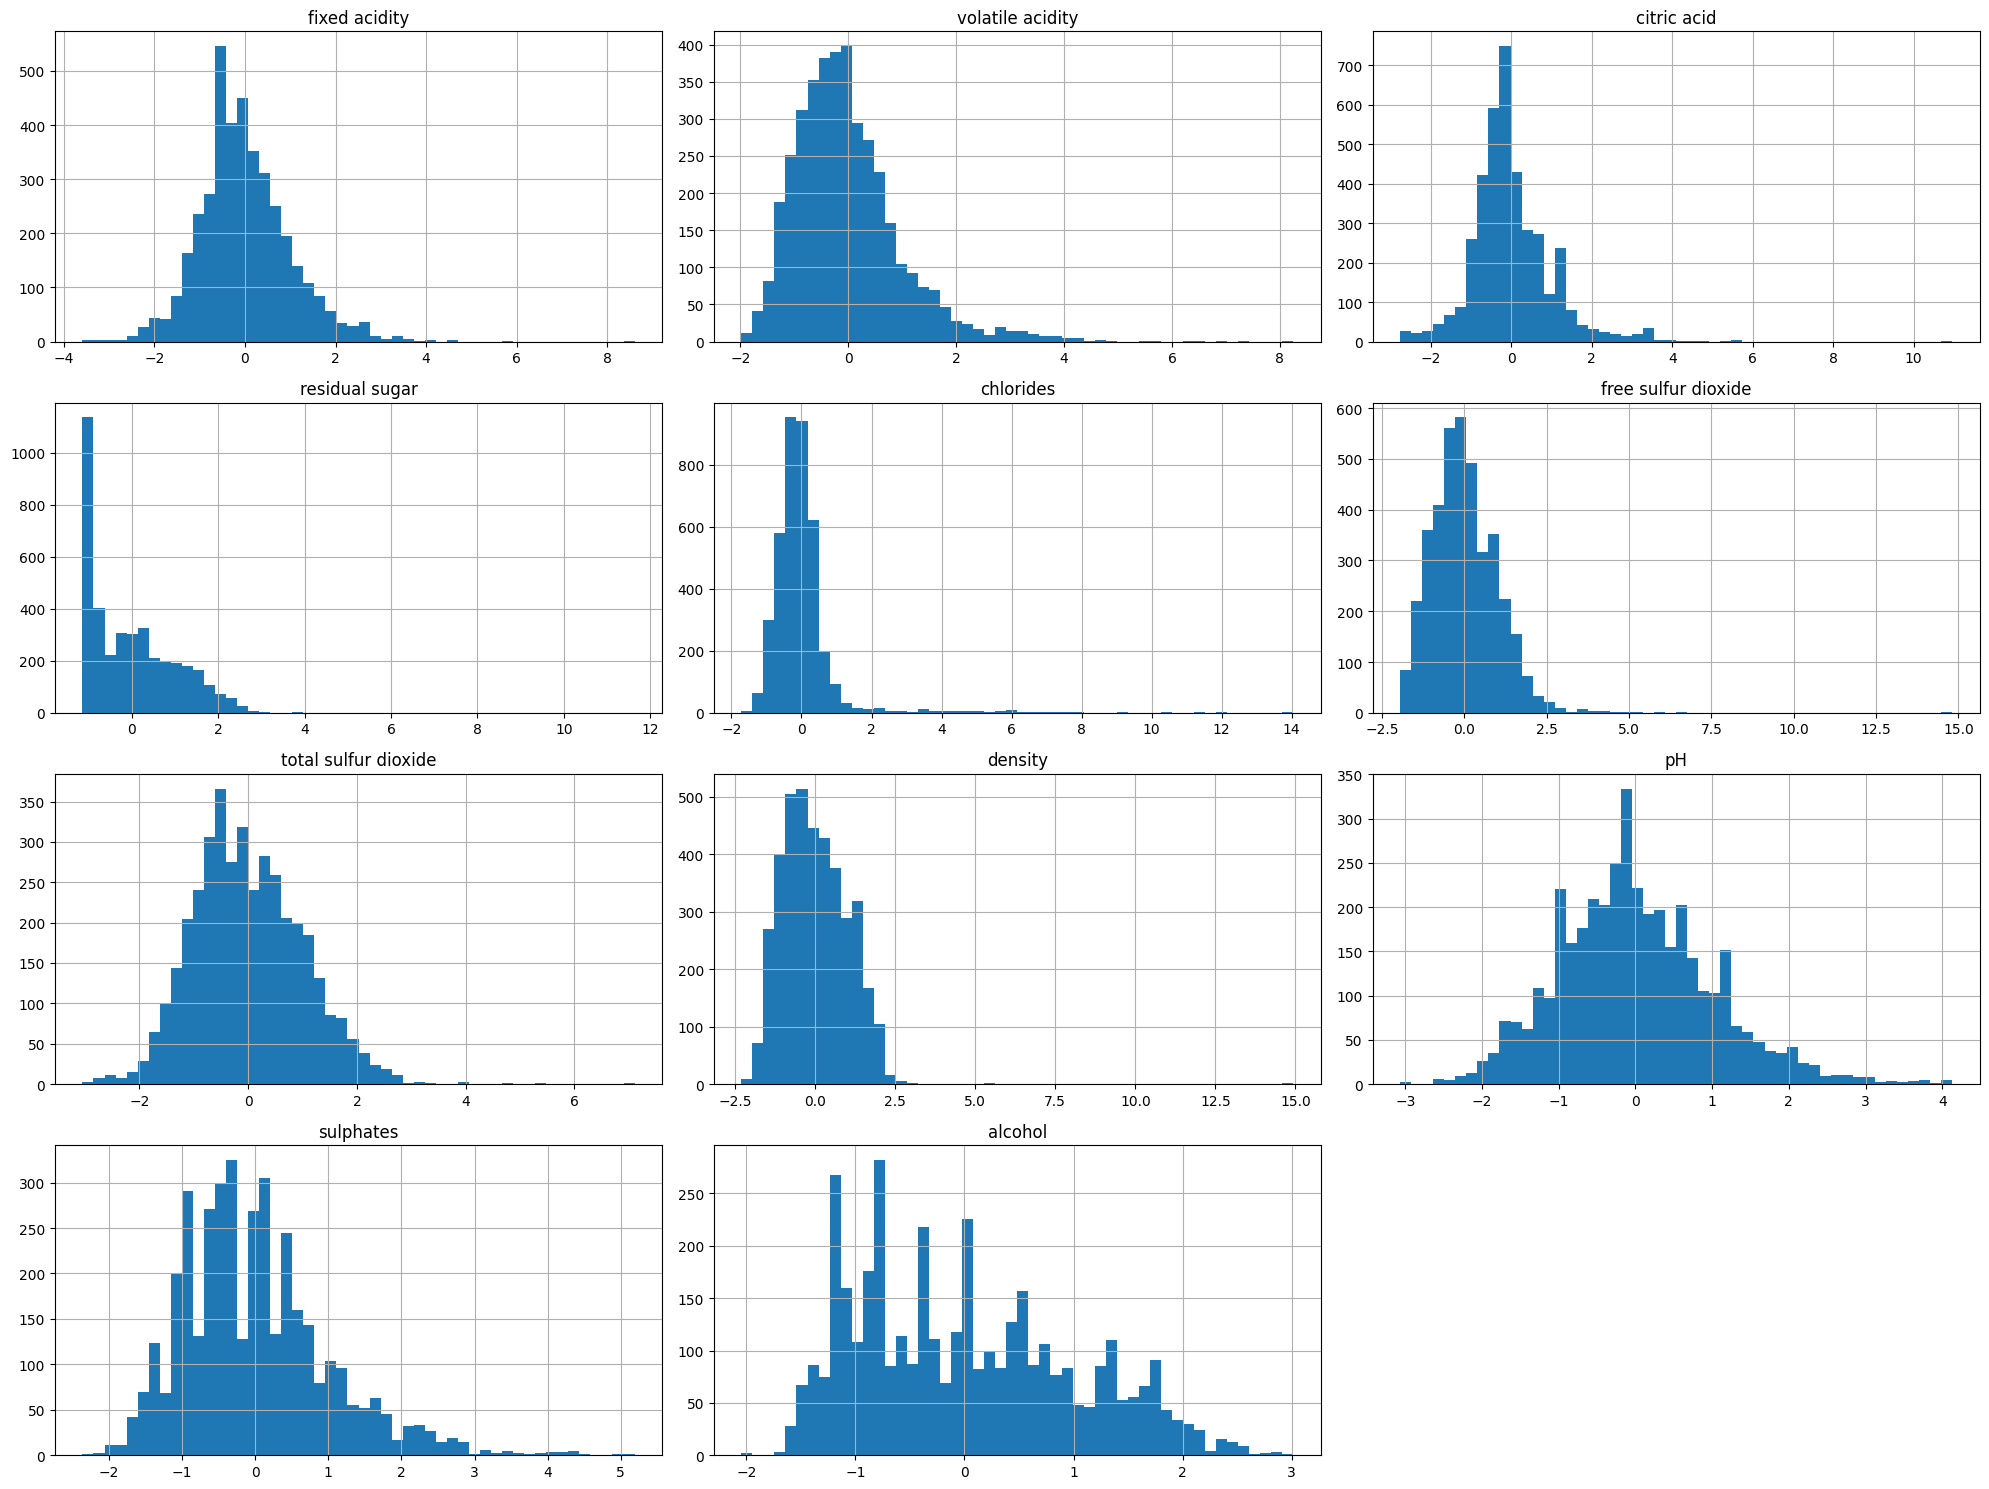

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'concrete' is a DataFrame and you have column names in 'concrete.columns'
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns)

X_train_std_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()  # To ensure the subplots do not overlap
plt.show()

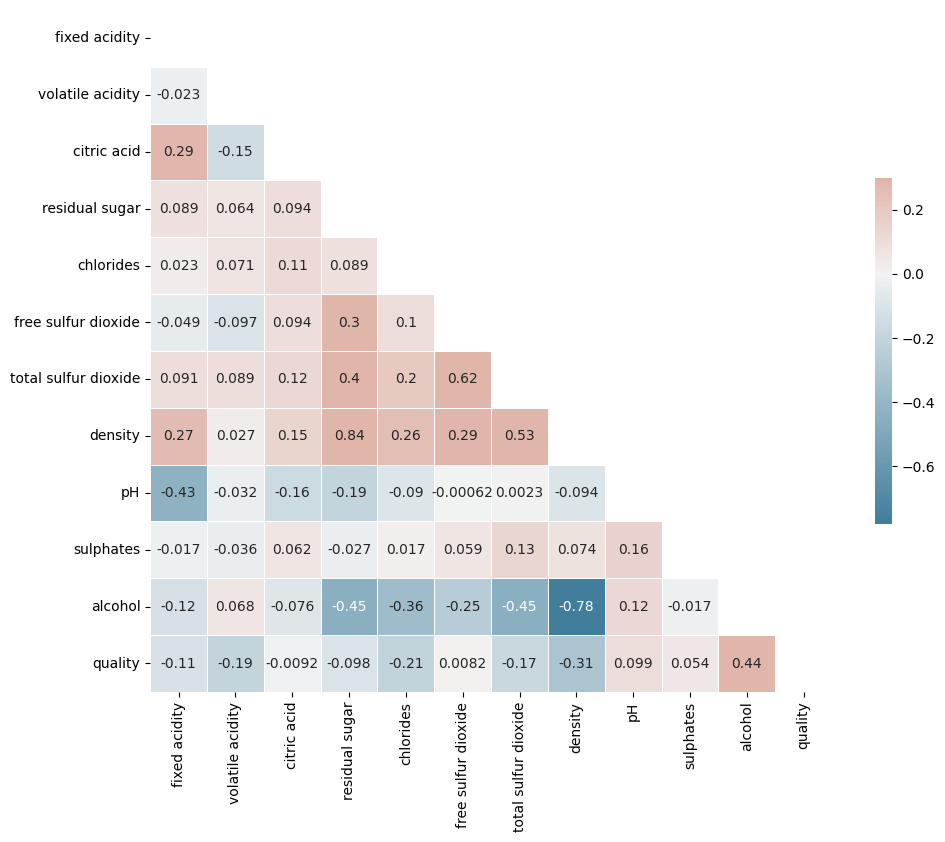

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

alcohol has highest correlation with quality, 2nd is density, third is chloride and fourth is volatile acidity

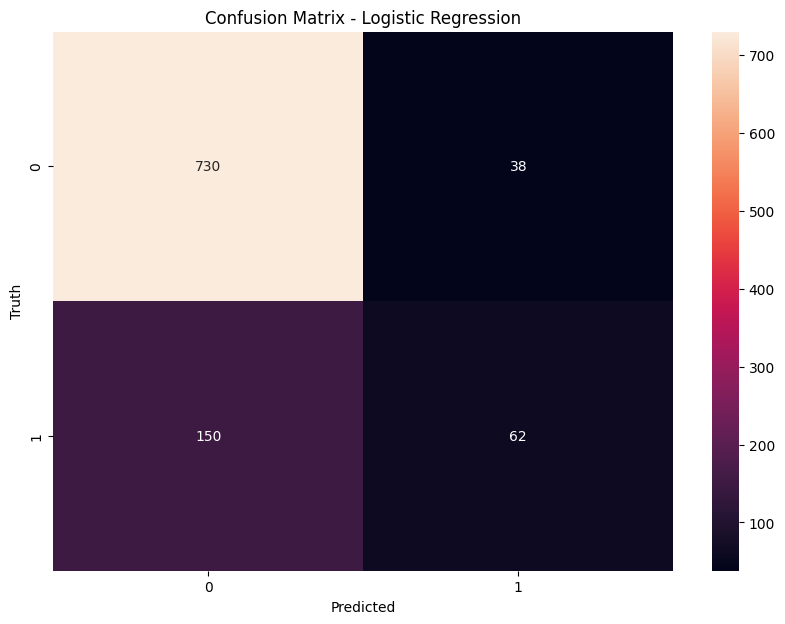


Logistic Regression Evaluation Metrics:
Accuracy: 0.81
Precision: 0.78
Recall: 0.81
F1-score: 0.78


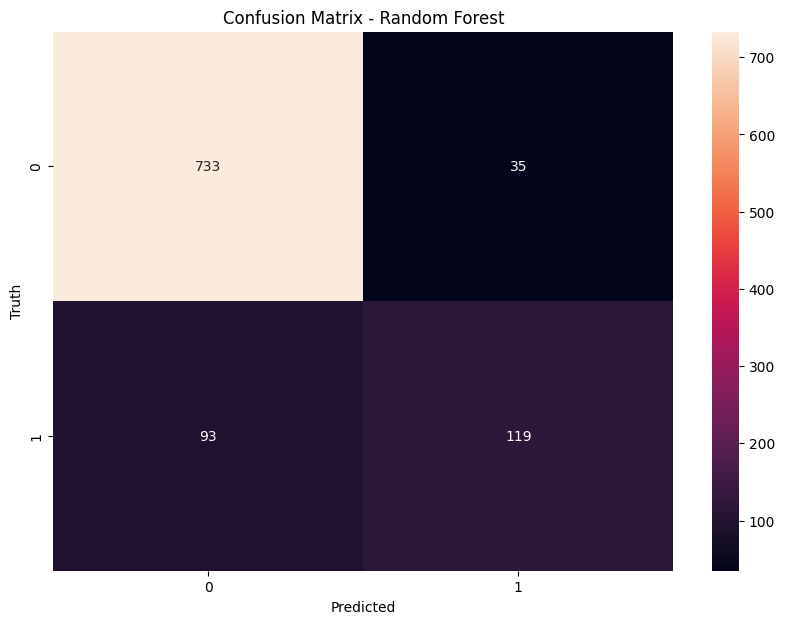


Random Forest Evaluation Metrics:
Accuracy: 0.87
Precision: 0.86
Recall: 0.87
F1-score: 0.86


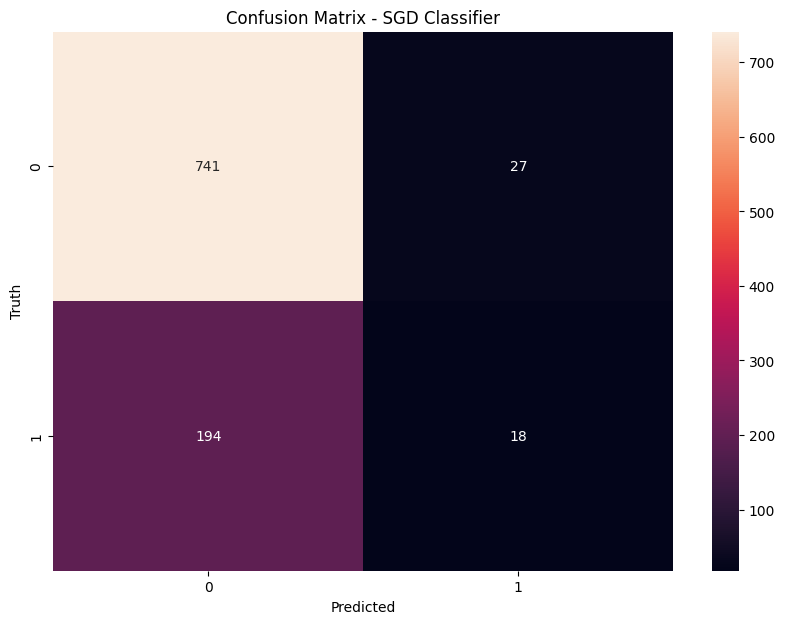


SGD Classifier Evaluation Metrics:
Accuracy: 0.77
Precision: 0.71
Recall: 0.77
F1-score: 0.71


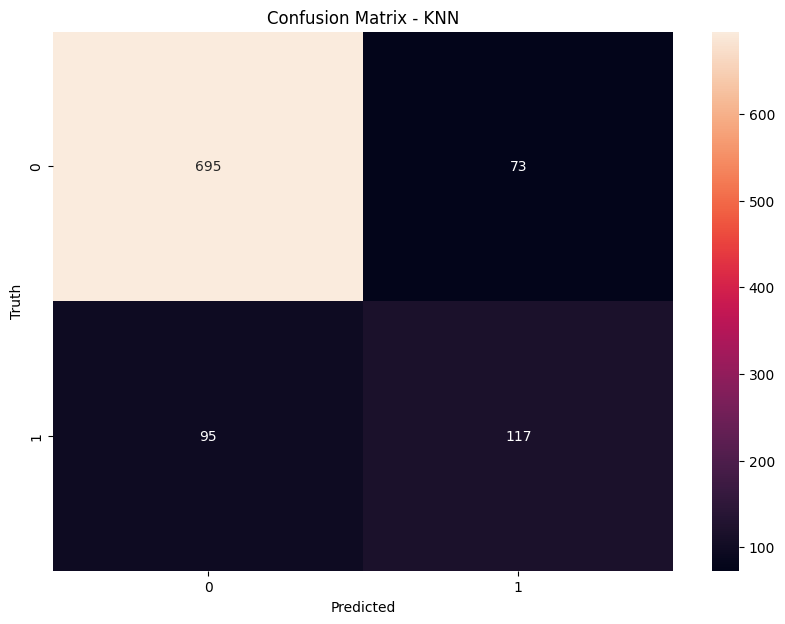


KNN Evaluation Metrics:
Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1-score: 0.83
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.808163   0.784215  0.808163  0.780250
1        Random Forest  0.869388   0.862600  0.869388  0.861415
2       SGD Classifier  0.774490   0.707602  0.774490  0.712278
3                  KNN  0.828571   0.822646  0.828571  0.825091


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define your models here
models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model
for name, model in models_binary.items():
    # Fit the model
    model.fit(X_train_std, y_train_high)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test_high, y_pred)
    precision = precision_score(y_test_high, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_high, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_high, y_pred, average='weighted', zero_division=0)
    
    # Append metrics to lists
    model_names.append(name)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_high, y_pred)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Display the DataFrame
print(metrics_df)


In [47]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

TEST USING DUMMY TO PROVE ACCURACY IS NOT A GOOD PERFORMANCE MEASUREMENT FOR CLASSIFICATION TASK

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf_high = SGDClassifier(random_state=42)
sgd_clf_high.fit(X_train, y_train_high)

SGDClassifier(random_state=42)

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf_high, X_train, y_train_high, cv=3, scoring="accuracy")

array([0.79019908, 0.77947933, 0.78101072])

note: is cv=3, there is a 3 fold for this dataset and the output "array([0.79019908, 0.77947933, 0.78101072])" tell us the accuracy score for each 3 different fold.

In [50]:
from sklearn.dummy import DummyClassifier

dummy_clf_high = DummyClassifier()
dummy_clf_high.fit(X_train, y_train_high)
print(any(dummy_clf_high.predict(X_train)))

False


False here means that all output is zero value. The "print(any(dummy_clf.predict(X_train)))" will print true if there is any True value in its prediction. In our case 0 value is is the low quality wine as it is below 7. Hence, the dummy predict everything as low quality

In [51]:
cross_val_score(dummy_clf_high, X_train, y_train_high, cv=3, scoring="accuracy")

array([0.78330781, 0.78330781, 0.78407351])

as observed, eventhough the dummy classified everything as false, it can still get accuracy of 78% for all fold, but why is that?

In [52]:

above_or_equal_7 = wine[wine['quality'] >= 7].shape[0]
below_7 = wine[wine['quality'] < 7].shape[0]
only_7 = wine[wine['quality'] == 7].shape[0]
only_6 = wine[wine['quality'] == 6].shape[0] #since 6 has the highest count
total_rows = wine['quality'].shape[0]


print(f"Number of rows with 'quality' 7 and above: {above_or_equal_7}")
print(f"Number of rows with 'quality' less than 7: {below_7}")
print(f"Number of rows with 'quality' is 7: {only_7}")
print(f"Number of rows with 'quality' is 6: {only_6}")
print(f"Total number of rows in 'quality' column: {total_rows}")

Number of rows with 'quality' 7 and above: 1060
Number of rows with 'quality' less than 7: 3838
Number of rows with 'quality' is 7: 880
Number of rows with 'quality' is 6: 2198
Total number of rows in 'quality' column: 4898


note: the class is imbalance

also, as observed the low quality has 3838 rows and the total of rows is 4898. divide this 2 value will get 78%. Hence, that is why the accuracy is high because 78% of all the rows is low quality value

In [53]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_high, y_scores)

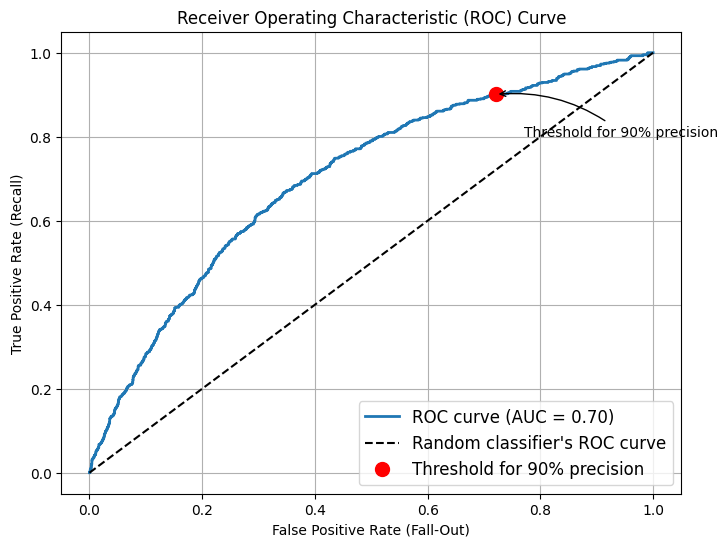

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Assuming y_train_high and y_scores are defined
fpr, tpr, thresholds = roc_curve(y_train_high, y_scores)
roc_auc = roc_auc_score(y_train_high, y_scores)

# Define threshold for 90% precision
precision_threshold = 0.9
threshold_idx = np.argmax(tpr >= precision_threshold)
threshold_for_90_precision = thresholds[threshold_idx]

plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier's ROC curve)
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")

# Plot threshold for 90% precision
plt.plot(fpr[threshold_idx], tpr[threshold_idx], 'ro', markersize=10, label="Threshold for 90% precision")

# Annotate threshold point with adjusted position
plt.annotate('Threshold for 90% precision',
             xy=(fpr[threshold_idx], tpr[threshold_idx]), xycoords='data',
             xytext=(20, -30), textcoords='offset points',  # Adjusted position
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)
plt.legend(loc="lower right", fontsize=12)
plt.show()


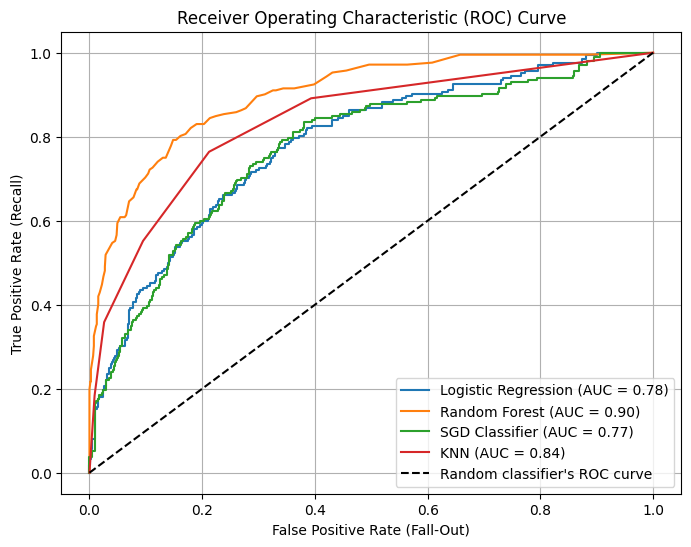

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize a list to store the model objects
models = []

# Fit and store each model
for name, model in models_binary.items():
    model.fit(X_train_std, y_train_high)
    models.append((name, model))

# Initialize figure
plt.figure(figsize=(8, 6))

# Iterate over each model
for name, model in models:
    # Compute scores
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_std)
    else:
        y_score = model.predict_proba(X_test_std)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_high, y_score)
    roc_auc = roc_auc_score(y_test_high, y_score)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random classifier's ROC curve
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")

# Set labels and title
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.grid(True)

# Add legend
plt.legend(loc="lower right", fontsize=10)

# Show plot
plt.show()


Based on the ROC, Random Forest produce the highest AUC.

it means that random forest can classify and make a clear distinction between positive and false value

MULTICLASS CLASSIFICATION 

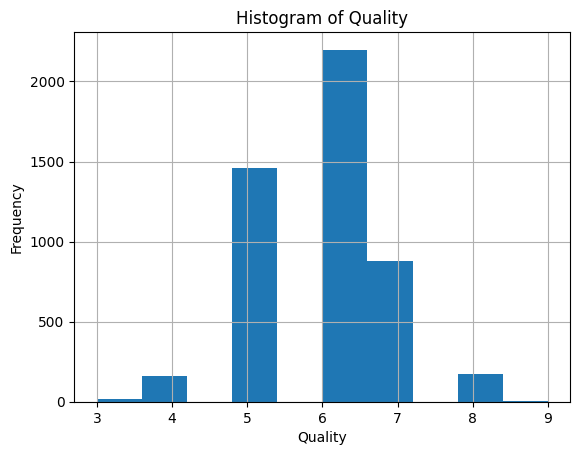

In [26]:
import matplotlib.pyplot as plt

# Plot a histogram for the "quality" column
wine['quality'].hist(bins=10)
plt.title('Histogram of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Based on the histogram above, it is observed that only quality 3,4,5,6,7,8 and 9 accordingly that has value, thus only 7 class will exist in the multiclass.

the name of the label will change accordingly in the confusion matrix

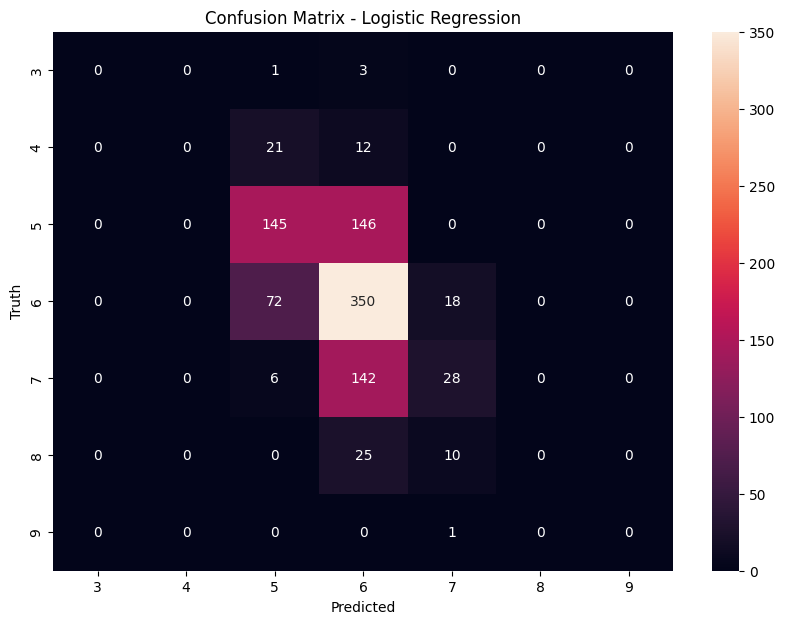


Logistic Regression Evaluation Metrics:
Accuracy: 0.53
Precision: 0.50
Recall: 0.53
F1-score: 0.48


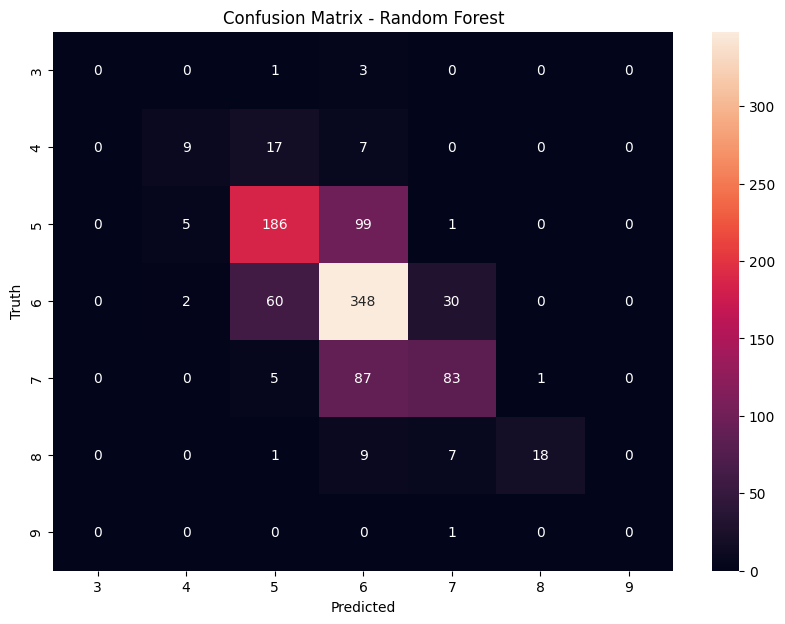


Random Forest Evaluation Metrics:
Accuracy: 0.66
Precision: 0.66
Recall: 0.66
F1-score: 0.65


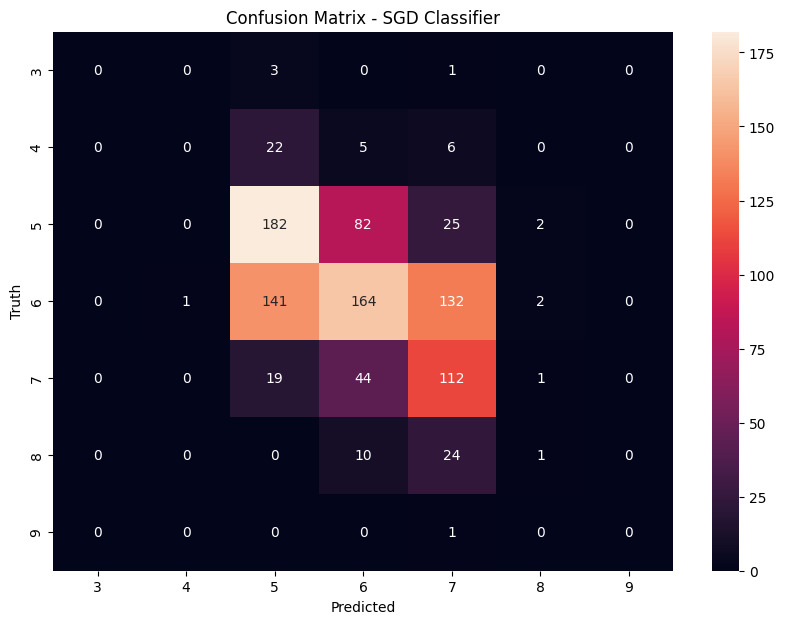


SGD Classifier Evaluation Metrics:
Accuracy: 0.47
Precision: 0.46
Recall: 0.47
F1-score: 0.45


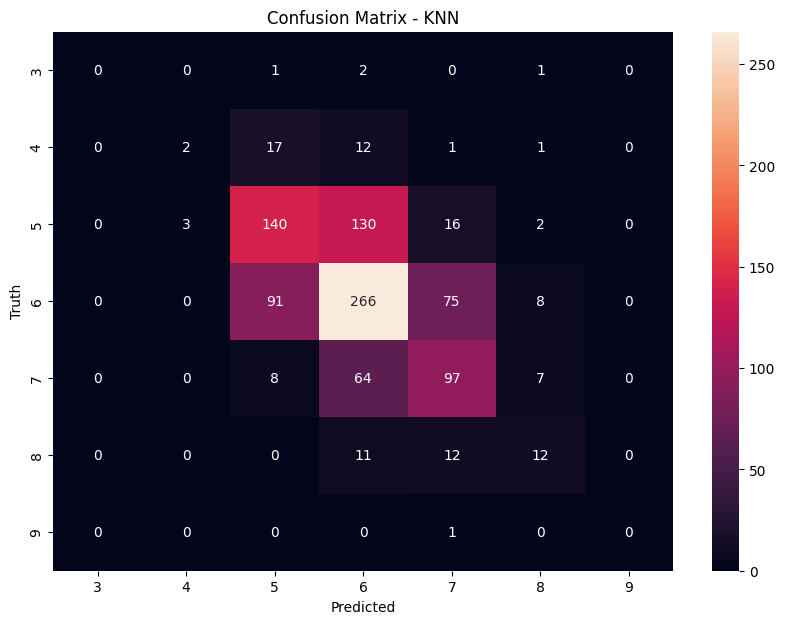


KNN Evaluation Metrics:
Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1-score: 0.52
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.533673   0.495734  0.533673  0.484935
1        Random Forest  0.657143   0.662056  0.657143  0.647814
2       SGD Classifier  0.468367   0.461452  0.468367  0.448014
3                  KNN  0.527551   0.521535  0.527551  0.518648


In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define your models here
models_multi = {
    "Logistic Regression": OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsRestClassifier(SGDClassifier()),
    "KNN": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Append evaluation metrics to lists
    model_names.append(name)
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Display the DataFrame
print(metrics_df)


based on the confusion matrix, it seems like all the model consistently give value 6,5 and 7 the highest score. This can be explained by histogram below as 6,5 and 7 is the top 3 highest frequency in the dataset, hence the model can predict it the most

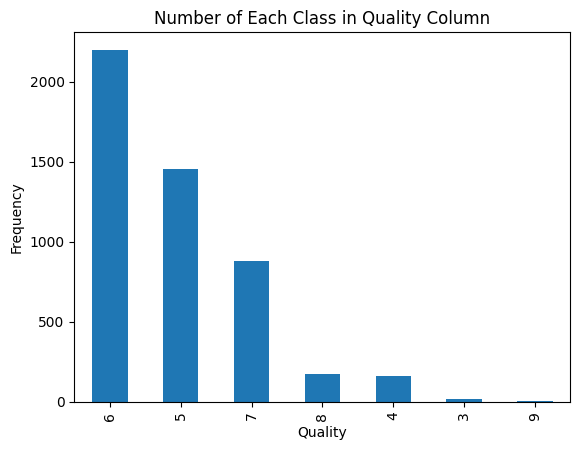


Number of each class in 'quality' column:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [28]:
import matplotlib.pyplot as plt

# Get the counts of each unique value in the 'quality' column
quality_counts = wine['quality'].value_counts()

# Plot a bar graph for the counts
quality_counts.plot(kind='bar')
plt.title('Number of Each Class in Quality Column')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Print the exact value of each class
print("\nNumber of each class in 'quality' column:")
print(quality_counts)

ONE VS ONE CLASSIFIER

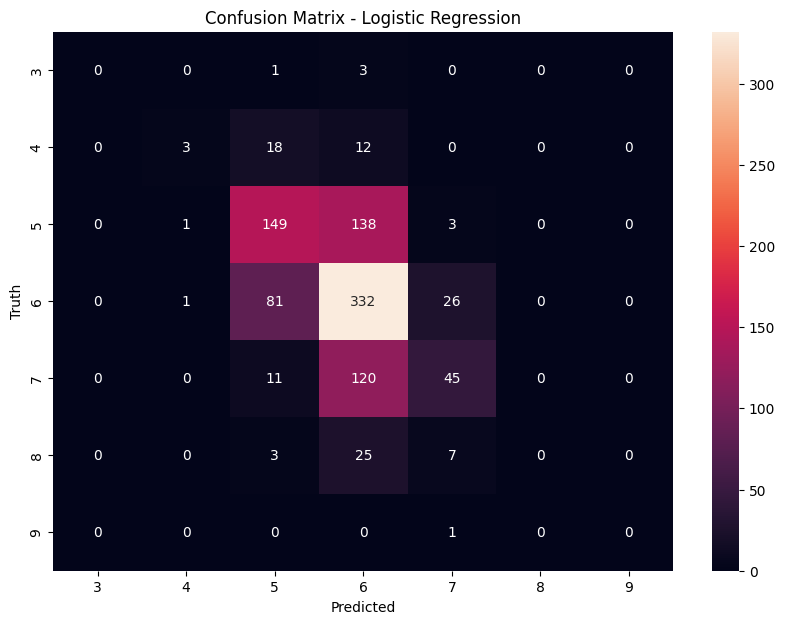


Logistic Regression Evaluation Metrics:
Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1-score: 0.51


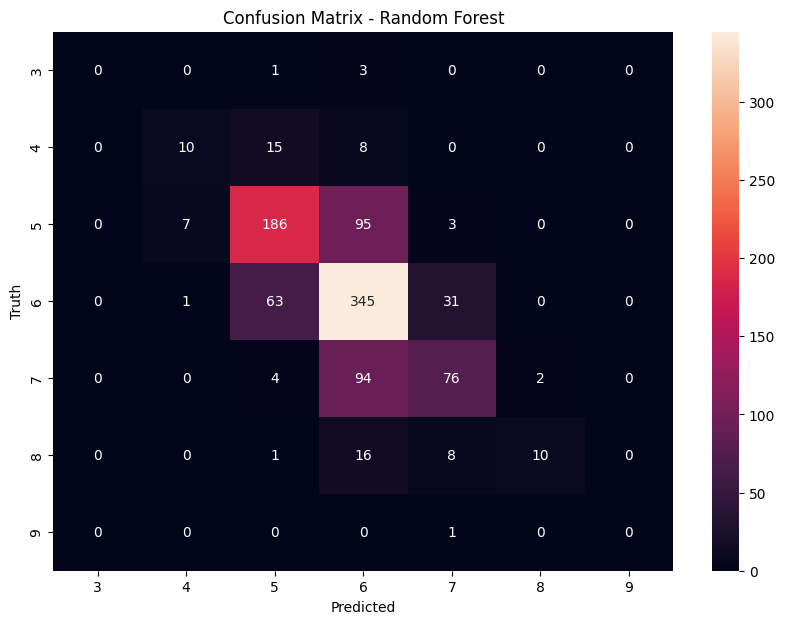


Random Forest Evaluation Metrics:
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1-score: 0.63


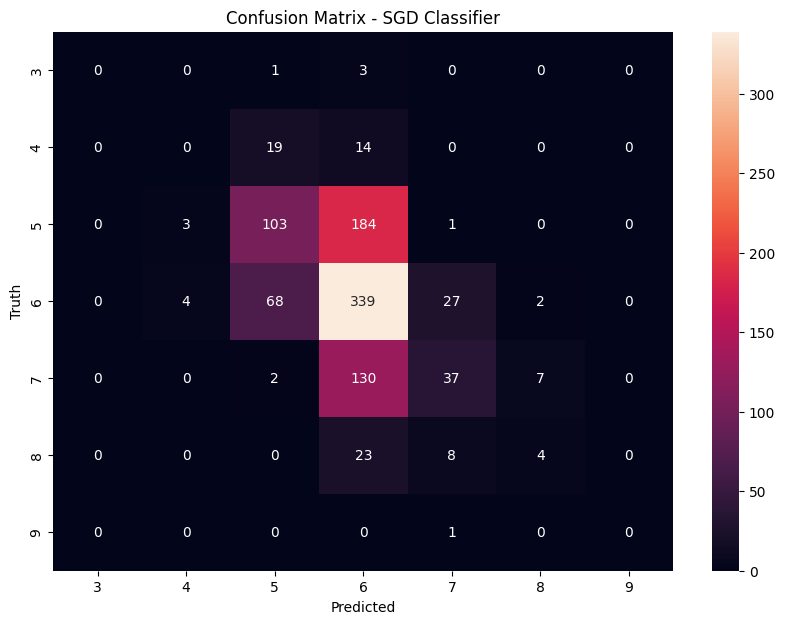


SGD Classifier Evaluation Metrics:
Accuracy: 0.49
Precision: 0.48
Recall: 0.49
F1-score: 0.45


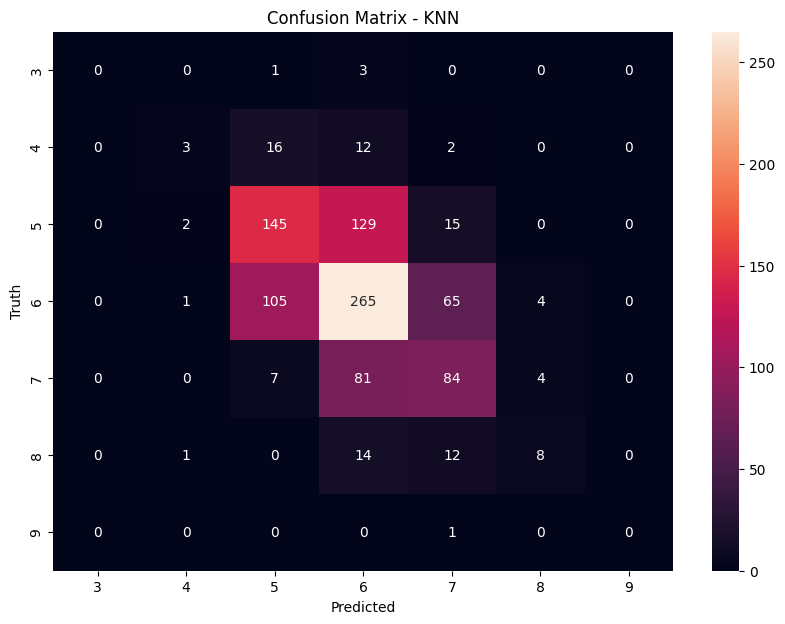


KNN Evaluation Metrics:
Accuracy: 0.52
Precision: 0.51
Recall: 0.52
F1-score: 0.51
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.533673   0.495734  0.533673  0.484935
1        Random Forest  0.657143   0.662056  0.657143  0.647814
2       SGD Classifier  0.468367   0.461452  0.468367  0.448014
3                  KNN  0.527551   0.521535  0.527551  0.518648


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define your models here
models_multi = {
    "Logistic Regression": OneVsOneClassifier(LogisticRegression(max_iter=1000)),
    "Random Forest": OneVsOneClassifier(RandomForestClassifier()),
    "SGD Classifier": OneVsOneClassifier(SGDClassifier()),
    "KNN": OneVsOneClassifier(KNeighborsClassifier(n_neighbors=5))
}

# Initialize lists to store evaluation metrics
models_evaluation = []

# Evaluate each model
for name, model in models_multi.items():
    # Fit the model
    model.fit(X_train_std, y_train)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    
# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Display the DataFrame
print(metrics_df)

same issue, 6,5 and 7 has the highest value due to the imbalance

CHECK WHETHER OVERFIT OR UNDERFIT


Logistic Regression Learning Curve:


c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


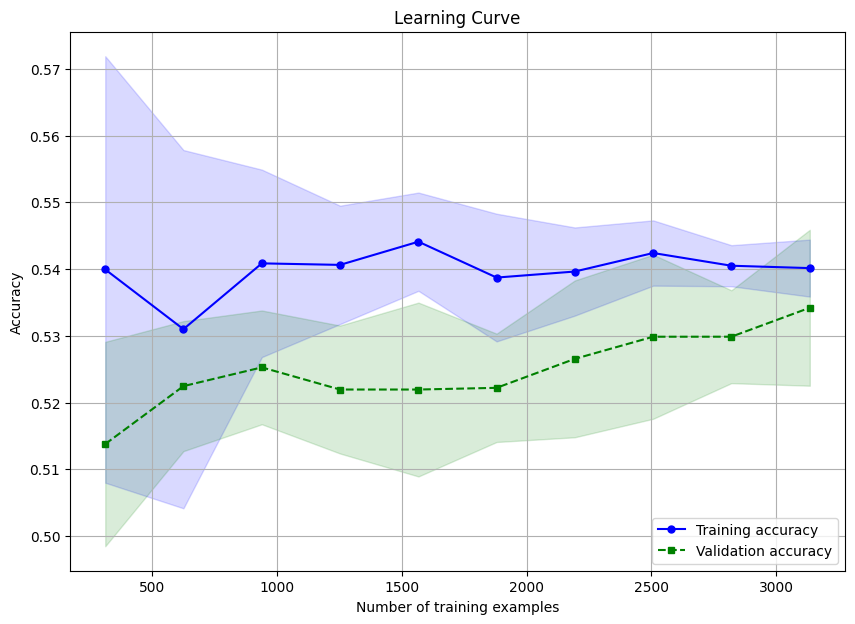


Random Forest Learning Curve:


c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


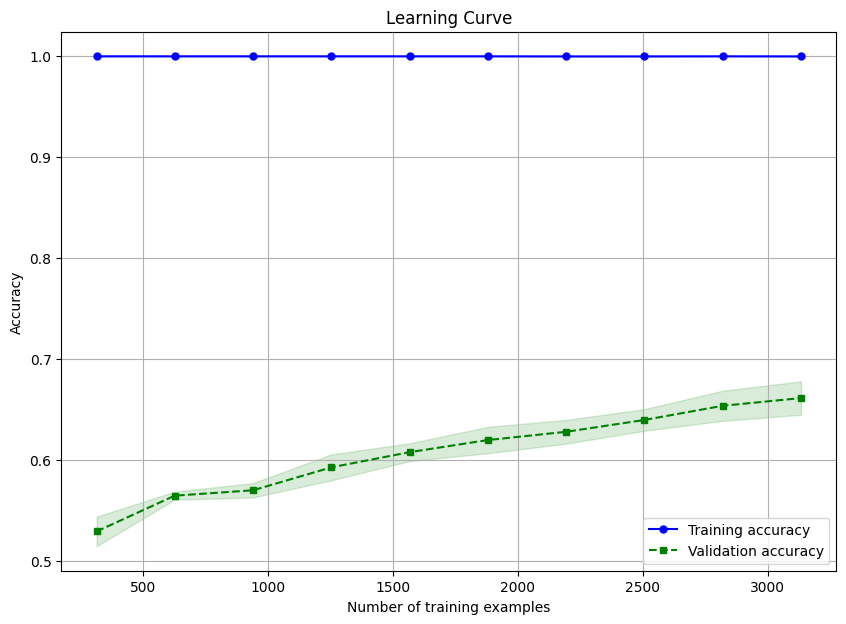


SGD Classifier Learning Curve:


c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


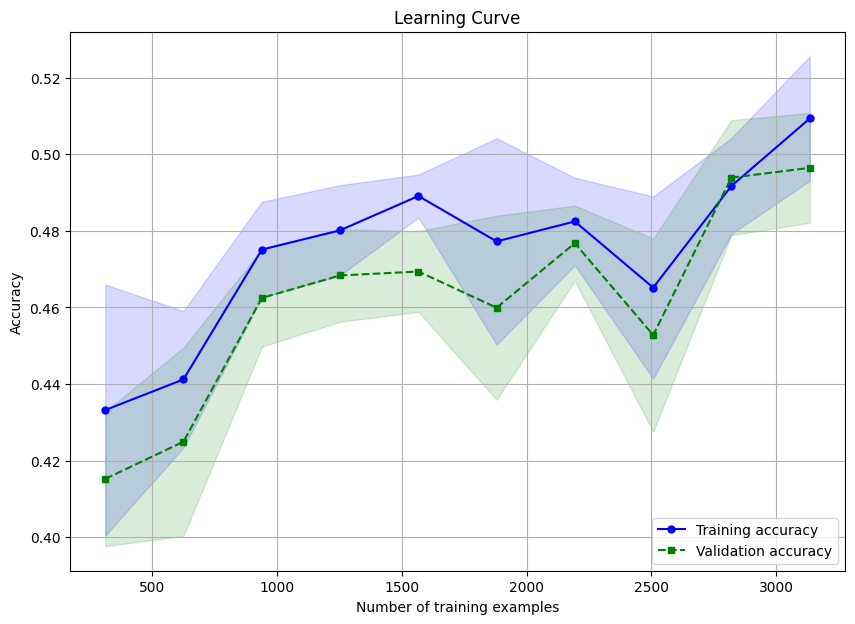


KNN Learning Curve:


c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


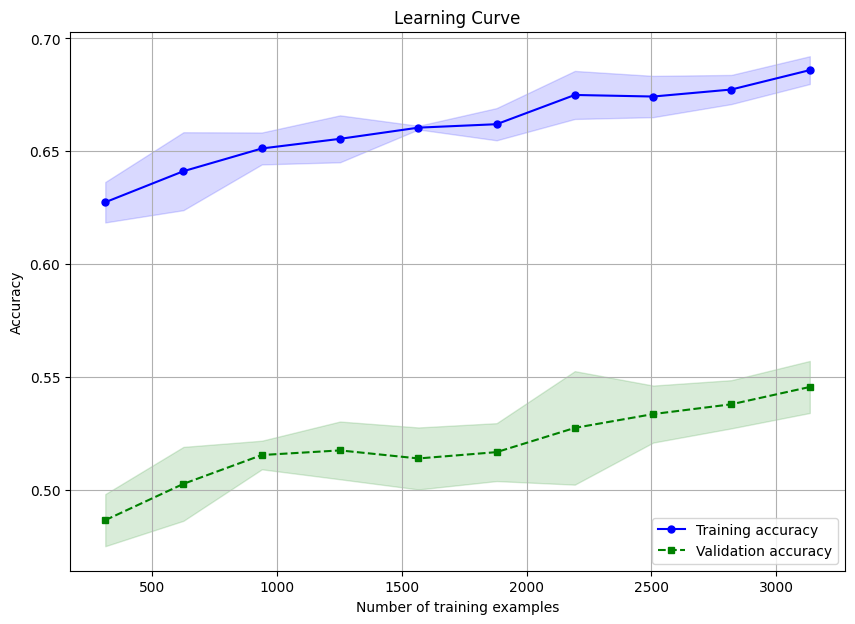

In [30]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.title('Learning Curve')
    plt.show()

# Plot learning curves for each model
for name, model in models_multi.items():
    print(f"\n{name} Learning Curve:")
    plot_learning_curve(model, X_train_std, y_train)


FOR KNN AND RANDOM FOREST, THE MODEL IS OVERFIT DUE TO THE BIG GAP BETWEEN TRAINING AND TEST ACCURACY

FOR SGD IT HAS UNSTABLE LEARNINNG CURVE

FOR LOGISTIC, THE GAP IS BIG BUT IT ALMOST CONVERSE AT THE END

REDUCE MODEL COMPLEXITY FOR KNN AND RANDOM FOREST TO REDUCE OVERFITTING

c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


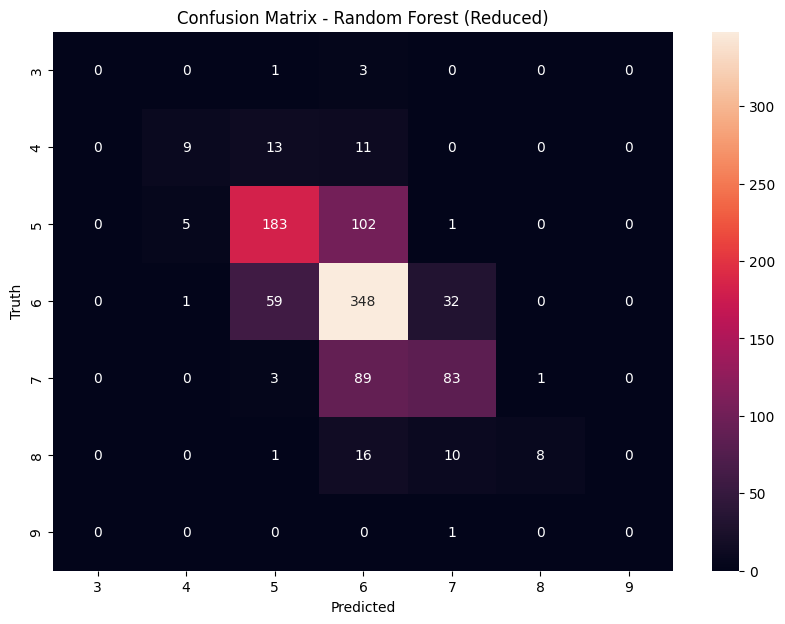


Random Forest (Reduced) Evaluation Metrics:
Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1-score: 0.63


c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


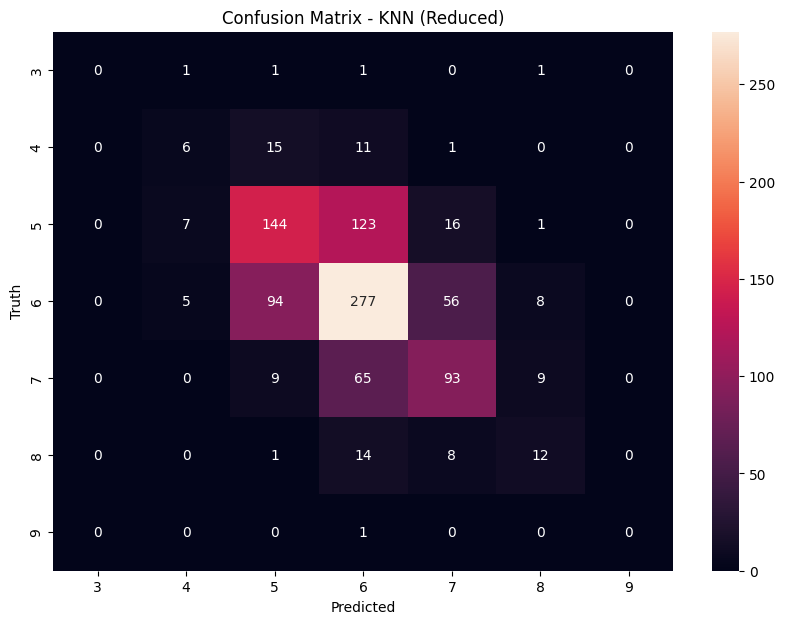


KNN (Reduced) Evaluation Metrics:
Accuracy: 0.54
Precision: 0.54
Recall: 0.54
F1-score: 0.54


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grids for grid search
param_grid_rf = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [5, 10, 15]
}

param_grid_knn = {
    'estimator__n_neighbors': [3, 5, 7]
}

# Define your models here with reduced complexity and grid search
models_multi = {
    "Random Forest (Reduced)": GridSearchCV(OneVsOneClassifier(RandomForestClassifier()), param_grid_rf),
    "KNN (Reduced)": GridSearchCV(OneVsOneClassifier(KNeighborsClassifier()), param_grid_knn)
}

# Initialize lists to store evaluation metrics
models_evaluation = []

# Evaluate each model with grid search
for name, model in models_multi.items():
    # Fit the model with grid search
    model.fit(X_train_std, y_train)
    
    # Get the best estimator from grid search
    best_model = model.best_estimator_
    
    # Predict the target values
    y_pred = best_model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


APPLYING OVERSAMPLING METHOD TO COUNTER THE IMBALANCE ISSUE

In [32]:
from imblearn.over_sampling import SMOTE

# Define SMOTE with custom sampling strategy
smote = SMOTE(sampling_strategy='auto',  # Automatically adjust the ratio
              k_neighbors=5,  # Number of nearest neighbors to use for SMOTE
              random_state=42)

# Apply SMOTE only to the high-quality class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, y_train_high)

# Check the class distribution after resampling
print("Number of each class after resampling:")
print(pd.Series(y_train_resampled).value_counts())


Number of each class after resampling:
quality
True     3070
False    3070
Name: count, dtype: int64


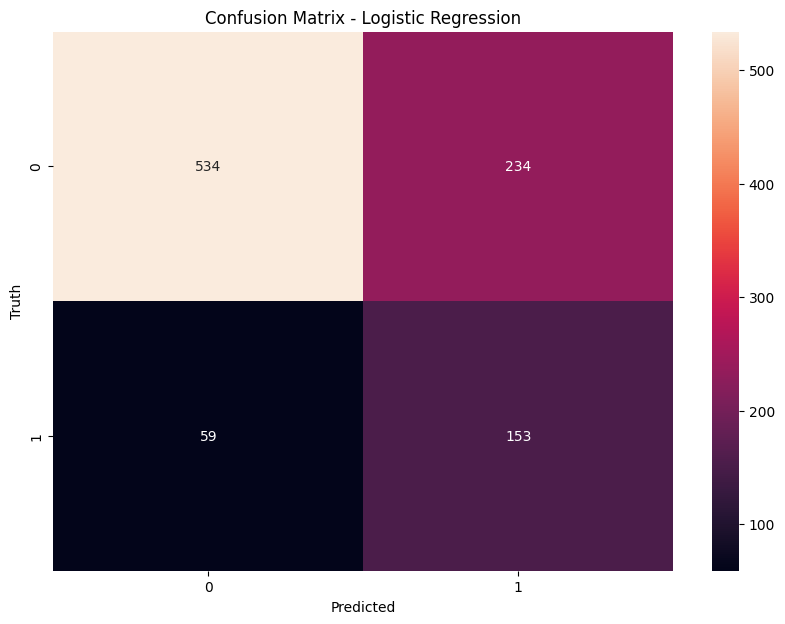


Logistic Regression Evaluation Metrics:
Accuracy: 0.70
Precision: 0.79
Recall: 0.70
F1-score: 0.73


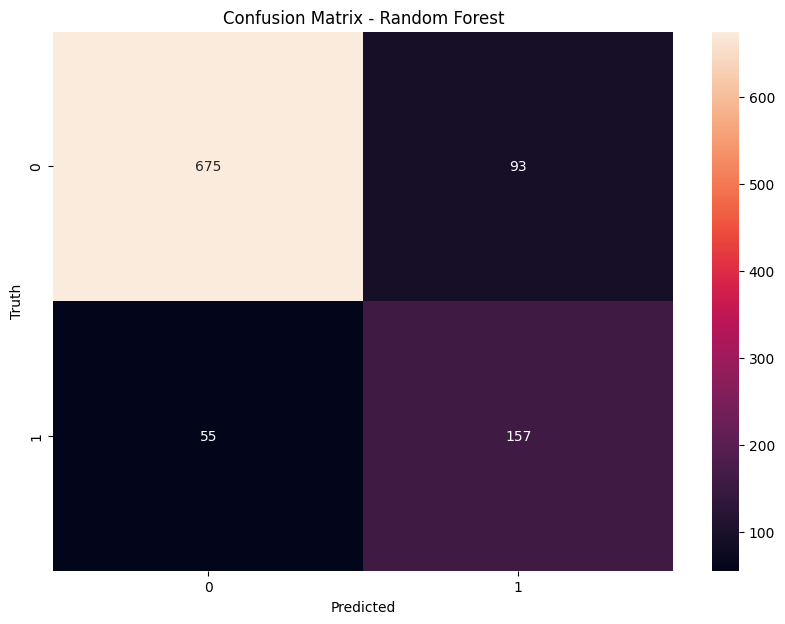


Random Forest Evaluation Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1-score: 0.85


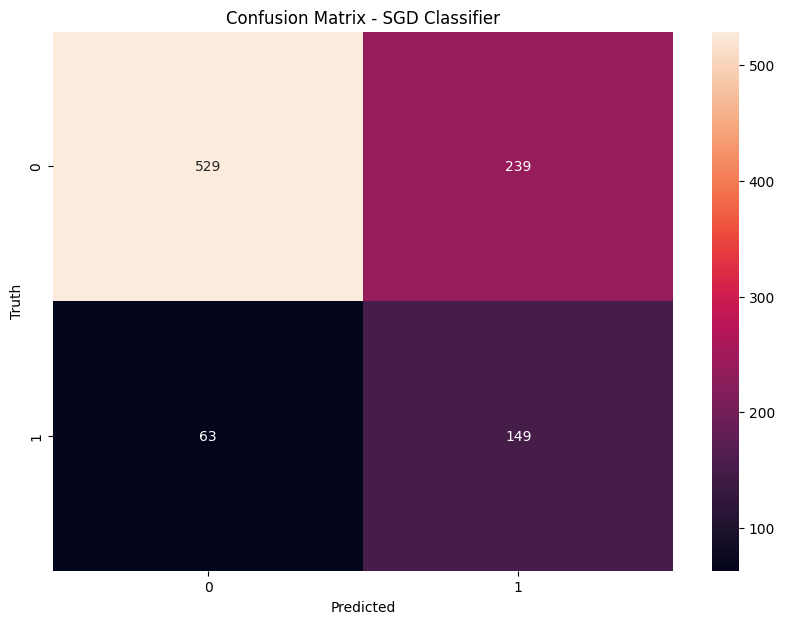


SGD Classifier Evaluation Metrics:
Accuracy: 0.69
Precision: 0.78
Recall: 0.69
F1-score: 0.72


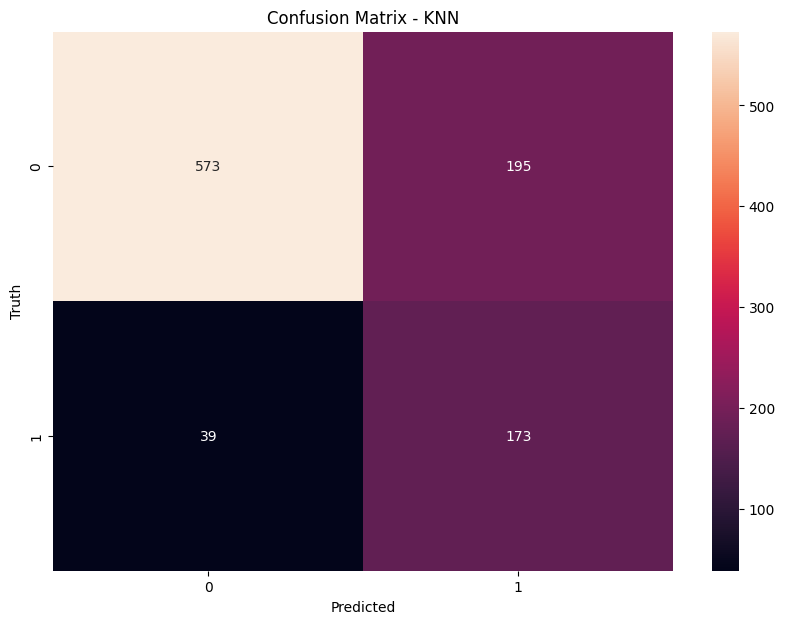


KNN Evaluation Metrics:
Accuracy: 0.76
Precision: 0.84
Recall: 0.76
F1-score: 0.78


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define your models here
models_binary = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Initialize lists to store evaluation metrics
models_evaluation = []

# Evaluate each model
for name, model in models_binary.items():
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict the target values
    y_pred = model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test_high, y_pred)
    precision = precision_score(y_test_high, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_high, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_high, y_pred, average='weighted', zero_division=0)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_high, y_pred)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


In [34]:
# Create a dictionary to store evaluation metrics
evaluation_metrics = {
    "Model": [],
    "Accuracy Before": [],
    "Precision Before": [],
    "Recall Before": [],
    "F1-score Before": [],
    "Accuracy After": [],
    "Precision After": [],
    "Recall After": [],
    "F1-score After": []
}

# Evaluate each model before and after oversampling
for name, model in models_binary.items():
    # Fit the model before oversampling
    model.fit(X_train_std, y_train_high)
    
    # Predict the target values before oversampling
    y_pred_before = model.predict(X_test_std)
    
    # Calculate evaluation metrics before oversampling
    acc_before = accuracy_score(y_test_high, y_pred_before)
    precision_before = precision_score(y_test_high, y_pred_before, average='weighted', zero_division=0)
    recall_before = recall_score(y_test_high, y_pred_before, average='weighted', zero_division=0)
    f1_before = f1_score(y_test_high, y_pred_before, average='weighted', zero_division=0)
    
    # Fit the model after oversampling
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict the target values after oversampling
    y_pred_after = model.predict(X_test_std)
    
    # Calculate evaluation metrics after oversampling
    acc_after = accuracy_score(y_test_high, y_pred_after)
    precision_after = precision_score(y_test_high, y_pred_after, average='weighted', zero_division=0)
    recall_after = recall_score(y_test_high, y_pred_after, average='weighted', zero_division=0)
    f1_after = f1_score(y_test_high, y_pred_after, average='weighted', zero_division=0)
    
    # Append evaluation metrics to the dictionary
    evaluation_metrics["Model"].append(name)
    evaluation_metrics["Accuracy Before"].append(acc_before)
    evaluation_metrics["Precision Before"].append(precision_before)
    evaluation_metrics["Recall Before"].append(recall_before)
    evaluation_metrics["F1-score Before"].append(f1_before)
    evaluation_metrics["Accuracy After"].append(acc_after)
    evaluation_metrics["Precision After"].append(precision_after)
    evaluation_metrics["Recall After"].append(recall_after)
    evaluation_metrics["F1-score After"].append(f1_after)

# Convert the dictionary to a DataFrame
import pandas as pd
evaluation_df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_df)


                 Model  Accuracy Before  Precision Before  Recall Before  \
0  Logistic Regression         0.808163          0.784215       0.808163   
1        Random Forest         0.871429          0.865013       0.871429   
2       SGD Classifier         0.772449          0.716142       0.772449   
3                  KNN         0.828571          0.822646       0.828571   

   F1-score Before  Accuracy After  Precision After  Recall After  \
0         0.780250        0.701020         0.791227      0.701020   
1         0.863249        0.845918         0.856539      0.845918   
2         0.723132        0.665306         0.763535      0.665306   
3         0.825091        0.761224         0.835430      0.761224   

   F1-score After  
0        0.725473  
1        0.849997  
2        0.693176  
3        0.779840  


somehow after using oversampling method for binary, the accuracy, precision, recall and F1 score are all become slightly lower after oversampling. we will stick with the before oversampling method

OVERSAMPLING FOR MULTICLASS

In [35]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling with a lower number of neighbors
smote = SMOTE(k_neighbors=3)  # Set the number of neighbors to 3 (or any suitable value)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, y_train)

In [36]:
# Check the class distribution after resampling
print("Number of each class after resampling:")
print(pd.Series(y_train_resampled).value_counts())

Number of each class after resampling:
quality
7    1758
5    1758
6    1758
8    1758
4    1758
3    1758
9    1758
Name: count, dtype: int64


FOR OVR

c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gomug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py", line 330, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

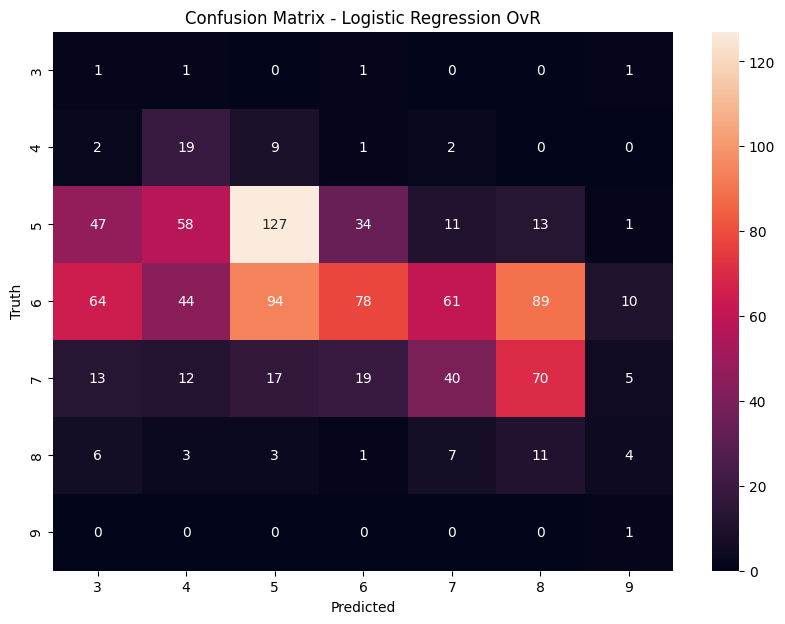


Logistic Regression OvR Evaluation Metrics:
Accuracy: 0.28
Precision: 0.48
Recall: 0.28
F1-score: 0.32


KeyboardInterrupt: 

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE for oversampling with a lower number of neighbors
smote = SMOTE(random_state=42, k_neighbors=3) # Set the number of neighbors to 3 (or any suitable value)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, y_train)

# Define parameter grids for grid search
param_grid_logistic = {
    'estimator__C': [0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2']
}

param_grid_rf = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [5, 10, 15]
}

param_grid_sgd = {
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__penalty': ['l1', 'l2']
}

param_grid_knn = {
    'estimator__n_neighbors': [3, 5, 7]
}

# Define your models here with grid search
models_multi = {
    "Logistic Regression OvR": GridSearchCV(OneVsRestClassifier(LogisticRegression(max_iter=1000)), param_grid_logistic),
    "Random Forest OvR": GridSearchCV(OneVsRestClassifier(RandomForestClassifier()), param_grid_rf),
    "SGD Classifier OvR": GridSearchCV(OneVsRestClassifier(SGDClassifier()), param_grid_sgd),
    "KNN OvR": GridSearchCV(OneVsRestClassifier(KNeighborsClassifier()), param_grid_knn)
}

# Initialize lists to store evaluation metrics
models_evaluation = []

# Evaluate each model with grid search
for name, model in models_multi.items():
    # Fit the model with grid search
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get the best estimator from grid search
    best_model = model.best_estimator_
    
    # Predict the target values
    y_pred = best_model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")


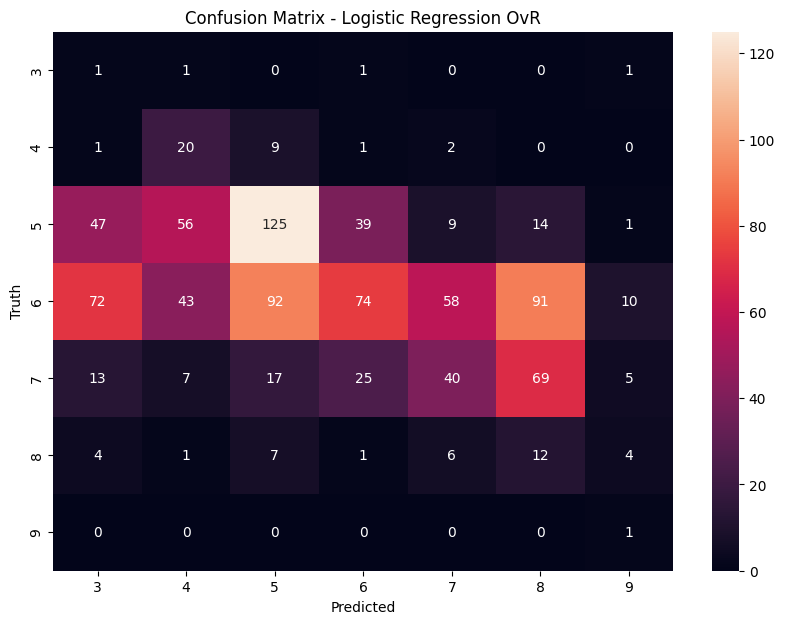


Logistic Regression OvR Evaluation Metrics:
Accuracy: 0.28
Precision: 0.45
Recall: 0.28
F1-score: 0.31


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE for oversampling with a lower number of neighbors
smote = SMOTE(k_neighbors=2)  # Set the number of neighbors to 3 (or any suitable value)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_std, y_train)

# Define parameter grids for grid search
param_grid_lr = {
    'estimator__C': [0.1, 1, 10],
    'estimator__penalty': ['l2']  # Use only 'l2' penalty
}

param_grid_rf = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [5, 10, 15]
}

param_grid_sgd = {
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__penalty': ['l1', 'l2']
}

param_grid_knn = {
    'estimator__n_neighbors': [3, 5, 7]
}

# Define your models here with grid search
models_multi = {
    "Logistic Regression OvR": GridSearchCV(OneVsRestClassifier(LogisticRegression(max_iter=1000)), param_grid_lr, error_score='raise'),
    "Random Forest OvR": GridSearchCV(OneVsRestClassifier(RandomForestClassifier()), param_grid_rf, error_score='raise'),
    "SGD Classifier OvR": GridSearchCV(OneVsRestClassifier(SGDClassifier()), param_grid_sgd, error_score='raise'),
    "KNN OvR": GridSearchCV(OneVsRestClassifier(KNeighborsClassifier()), param_grid_knn, error_score='raise')
}

# Initialize lists to store evaluation metrics
models_evaluation = []

# Evaluate each model with grid search
for name, model in models_multi.items():
    # Fit the model with grid search
    model.fit(X_train_resampled, y_train_resampled)
    
    # Get the best estimator from grid search
    best_model = model.best_estimator_
    
    # Predict the target values
    y_pred = best_model.predict(X_test_std)
    
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify zero_division parameter
    
    # Compute confusion matrix with specific labels
    cm = confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9])
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=[3, 4, 5, 6, 7, 8, 9], yticklabels=[3, 4, 5, 6, 7, 8, 9])
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Print evaluation metrics
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
